# Logistic Regression

### 首先，要介紹Logistic Regression之前，要先介紹一個logistic function:Sigmoid function，和sign function不同的是，Logistic Regression用sigmoid function來approximate target func. .

###  Sigmoid(x):

$$\theta(s) = 1/(1+e^{-s}) = 1/(1+e^{-w^{T}X}) $$

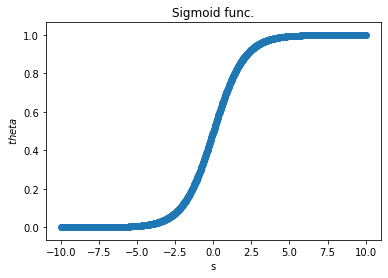

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10,10)
y = np.arange(1, -1, 20)
m = y.size
w = np.linspace(-10,10, 1000)
yval = []
for i in w:
    y_hat = 1/(1+np.exp(-i))  
    yval.append(y_hat)   
fig = plt.figure()
ax = plt.axes()
ax.scatter(w, yval)
plt.title('Sigmoid func.')
plt.ylabel(" $theta$ ")
plt.xlabel("s")
plt.show()

### 經過likelihood的推導，我們可以得出Error func:

$$E_{in}(w)=(1/N)\Sigma_{n=1}^{N}ln(1+e^{-y_{n}w^{T}X_{n}})$$

### 有了Error func.，我們就可以用gradient descent去更新我們的權重W。核心概念就是對$E_{in}$取$\bigtriangledown$，會得到Error func. 沿著W方向的變化量，要得到Error func. 最小值就需要滿足$\bigtriangledown E_{in}(w_{t}) = 0$，將W用$\bigtriangledown E_{in}(w_{t})$更新，就可以慢慢的將Error func.往最小值的地方更新。

$$\bigtriangledown E_{in}(w_{t}) = (1/N)\Sigma_{n=1}^{N}\theta(-y_{n}w_{t}^{T}X_{n})(-y_{n}X_{n}))$$


$$w_{t+1} \leftarrow w_{t}-\eta\bigtriangledown E_{in}(w_{t})$$

### $\eta$ 就是所謂的Learning rate，可以決定每次更新走的步長。太小的$\eta$會讓gradient descent更新的步數太多，增加計算量，但是太大容易讓Error func. 更新時，不小心略過最小值的點。

### 所以我們Logistic Regression算法如下：

### initialize $w_{0}$, for t = 0,1... :

* compute: 
$$\bigtriangledown E_{in}(w_{t}) = (1/N)\Sigma_{n=1}^{N}\theta(-y_{n}w_{t}^{T}X_{n})(-y_{n}X_{n}) $$
* update by:
$$w_{t+1} \leftarrow w_{t}-\eta\bigtriangledown E_{in}(w_{t})$$

...until $\bigtriangledown E_{in}(w_{t+1})$ = 0 or enough iterations.

### 現在來實際使用Logistic Regrssion在data上：

In [2]:
X_train = np.genfromtxt("/Users/huangyuchen/Desktop/ML_NTU/hw3_train.dat.txt")
X_test = np.genfromtxt("/Users/huangyuchen/Desktop/ML_NTU/hw3_test.dat.txt")
y_train = np.reshape(X_train[:,-1],(-1,1))
y_test = np.reshape(X_test[:,-1],(-1,1))

eta = 0.01
T = 2000

def sigmoid(s):
    return 1/(np.exp(-s)+1)

def gradient(X,y,w):
    m,n = X.shape
    y = np.reshape(y,(m,1))    
    return (1/m)*(-y*X).T.dot(sigmoid(-y*(X.dot(w))))

def GradientDescent(X,T):
    m,n = X.shape
    w = np.zeros((n-1,1))
    for i in range(T):  
        grad = gradient(X[:,:-1],X[:,-1],w)
        w = w-eta*grad
    return w

w = GradientDescent(X_train,T)
train_result = X_train[:,:-1].dot(w)
test_result = X_test[:,:-1].dot(w)

print("Ein:{:.3f}\n".format(np.mean(np.sign(train_result)!=y_train)),"Eout:{:.3f}".format(np.mean(np.sign(test_result)!=y_test)))

Ein:0.198
 Eout:0.221


### W 隨著T輪的更新變動，T越大，$E_{in}$和$E_{out}$越小，直到達到最小值為止，由此可知，$\bigtriangledown E_{in}(w)$ 確實讓W朝向$E_{in}$最小值的地方更新。

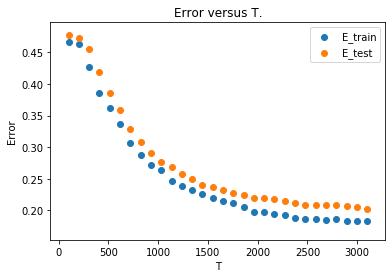

In [21]:
y = np.arange(0,0.5,10)
m = y.size
w_ = np.linspace(100,3100, 30)
E_train = []
E_test = []

for l in w_:
    
    _w = GradientDescent(X_train,int(l))
    ytrain_hat = np.mean(np.sign(X_train[:,:-1].dot(_w))!=y_train) 
    yteval_hat = np.mean(np.sign(X_test[:,:-1].dot(_w))!=y_test)
    E_train.append(ytrain_hat) 
    E_test.append(yteval_hat) 
    
fig = plt.figure()
ax = plt.axes()

p1 = ax.scatter(w_, E_train)
p2 = ax.scatter(w_, E_test)
ax.legend(['E_train','E_test'])
plt.title('Error versus T.')
plt.ylabel("Error")
plt.xlabel("T")
plt.show()

### 我們可以看到，Gradient Descent 的更新是由所有的$X_{n}$一起決定的，如果$X_{n}$越大，更新一次所需的時間就會隨之增加，因此在資料量過於龐大的時候，GD計算量大的缺點就會暴露出來，因此才有另一種GD的出現：
### Stochastic Gradient Descent(SGD) :

$$w_{t+1} \leftarrow w_{t}-\eta\theta(-y_{n}w_{t}^{T}X_{n})(-y_{n}X_{n}))$$

### SGD 藉由任一選定的$X_{n}$來更新W，而不是整個 X，因此在計算上會比GD快，但是因為SGD並不是使用真正的gradient來更新，因此對於$E_{in}$的更新比較不穩定，但是只要經過足夠次數的更新：

$$average \ true \ gradient \simeq SGD$$

In [40]:
def SGD(X,T):
    m,n = X.shape
    w = np.zeros((n-1,1))
    for i in range(T):  
        ## 將X1 ~ Xn依序拿去做SGD##
        grad = (-X[i%m,-1]*X[i%m,:-1])*sigmoid(-X[i%m,-1]*(X[i%m,:-1].dot(w)))
        grad = np.reshape(grad,(-1,1))
        w = w-eta*grad
    return w
w = SGD(X_train,2000)

train_result = X_train[:,:-1].dot(w)
test_result = X_test[:,:-1].dot(w)
print("Ein:{:.3f}\n".format(np.mean(np.sign(train_result)!=y_train)),"Eout:{:.3f}".format(np.mean(np.sign(test_result)!=y_test)))

Ein:0.179
 Eout:0.201


### 由結果與GD 比較得知，在足夠的迭代之後，SGD/GD的結果相差約10%，整體來說SGD的結果略好於GD，但是從下圖可以看出SGD的缺點，隨著W的更新，error的曲線震幅很大，有點像喝酒醉，這也體現出SGD的不穩定。

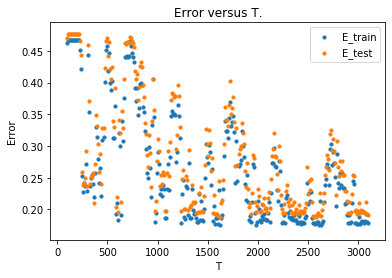

In [49]:
y = np.arange(0,0.5,10)
m = y.size
w_ = np.linspace(100,3100, 300)
E_train = []
E_test = []

for l in w_:
    _w = SGD(X_train,int(l))
    ytrain_hat = np.mean(np.sign(X_train[:,:-1].dot(_w))!=y_train) 
    yteval_hat = np.mean(np.sign(X_test[:,:-1].dot(_w))!=y_test)
    E_train.append(ytrain_hat) 
    E_test.append(yteval_hat) 
    
fig = plt.figure()
ax = plt.axes()

p1 = ax.scatter(w_, E_train,s = 10)
p2 = ax.scatter(w_, E_test,s = 10)
ax.legend(['E_train','E_test'])
plt.title('Error versus T.')
plt.ylabel("Error")
plt.xlabel("T")
plt.show()